# Laboratory 7

## Robot Arm Process. Modeling and Control

### 7.1 Euler-Lagrange equations

The Lagrangian is defined as

\begin{equation}
L=K-P,
\end{equation}
where $K$ represents the total kinetic energy of the system and $P$ represents the total potential energy of the system. 


The Euler-Lagrange equations that describe the dynamics of a $n-DOF$ mechanical system are:

\begin{equation}
\frac{d}{dt}\frac{\partial L}{\partial \dot{q}_i}-\frac{\partial L}{\partial q_i}=\tau_i, \qquad i=1,...,n,
\end{equation}

where $q_i$ represent generalized coordinates (in our case the joint angles) and $\tau_i$ generalized forces (in our case motor torques)


The matrix form of the Euler-Lagrange equations is:

\begin{equation}\label{robmodel}
D(q)\ddot{q}+C(q,\dot{q})\dot{q}+G(q)=\tau
\end{equation}

where $q=[q_1,...,q_n]^T, \tau=[\tau_1,...,\tau_n]^T$. 


The matrix $D(q)$ is called inertia matrix, it is symmetric and positive definite, and can be expressed in terms of the kinetic energy:
\begin{equation}
K=\frac{1}{2} \dot{q}^T D(q) \dot{q}=\frac{1}{2}\sum_{i,j}^{n} d_{i,j}(q)\dot{q}_i\dot{q}_j.
\end{equation}

The matrix $C(q)$ takes into account centrifugal and Coriolis terms, and each $k,j-th$ matrix element can be calculated as:

\begin{equation}\label{cterms}
c_{kj}=\frac{1}{2}\sum_{i=1}^{n} 
\bigg \{
\underbrace{
\frac{\partial d_{kj}}{\partial q_i}+\frac{\partial d_{ki}}{\partial q_j}-\frac{\partial d_{ij}}{\partial q_k}
}_{c_{ijk}}
\bigg \}
\dot{q}_i.
\end{equation}


The last term $G(q)$, sometimes called gravity term, is a column vector $G=[g_1...g_n]^T$, where each $k-th$ term is derived from the potential energy:

\begin{equation}\label{grav}
g_k(q)=\frac{\partial P}{\partial q_k },  \qquad k=1,...,n.
\end{equation}

### 7.2 A 2DOF robot arm with spatial movement

Consider a 2DOF robot arm with two revolute joints, that can move in a 3D Cartesian space, with the schematic representation from Figure 7.1. Because the first rotation axis is on the X axis, and the second on the Y axis, that robot can move in a 3D space.

<center>
    <figure class="image">
      <img src="artwork/DynMod/fig7-1.png" width=40% />
      <figcaption>Figure 7.1: Schematic representation of a 2DOF robot arm </figcaption>
    </figure>
</center>

#### 7.2.1 Geometric Model

The geometric model can be derived through transformation matrices from the base frame to the end effector frame. The base frame coincides with the first frame (that is the frame of joint 1, with origin $O_1$ in the center of the joint). Thus the transformation matrix $T_{01}$ is simply a rotation around X: 

\begin{equation}
T_{01}=Rot(x,q_1)=\begin{bmatrix}
 1 &       0 &        0 & 0\\
 0 & cos(q_1) & -sin(q_1) & 0\\
 0 & sin(q_1) &  cos(q_1) & 0\\
 0 &       0 &        0 & 1
\end{bmatrix}\
\end{equation}

From Frame 1 we arrive at Frame 2 (corresponding to the joint 2) through a translation on Z and a rotation around Y ($T_{12}$):

\begin{equation}
T_{12}=Transl(z,L_1) \cdot  Rot(y,q_2)=\begin{bmatrix}
  cos(q2) & 0 & sin(q2) &  0\\
       0 & 1 &       0 &  0\\
 -sin(q2) & 0 & cos(q2) & L_1\\
 0 &       0 &        0 & 1
\end{bmatrix}\
\end{equation}

 Finally, the end effector frame is obtained through a translation on Z ($T_{23}$): 

\begin{equation}
T_{23}=Transl(z,L_2)=\begin{bmatrix}
 1 &       0 &        0 & 0\\
 0 & 1 & 0 & 0\\
 0 & 0 &  1	 & L_2\\
 0 &       0 &        0 & 1
\end{bmatrix}\
\end{equation}


The transformation matrix from the based frame to the end effector, that is the geometric model is obtained through multiplication:

\begin{equation}\label{geom}
T=T_{03}=T_{01} \cdot T_{12} \cdot T_{23}= \begin{bmatrix}
          cos(q_2)&       0&          sin(q_2)&                 L_2sin(q_2)\\
  sin(q_1)sin(q_2)& cos(q_1)& -cos(q_2)sin(q_1)& -sin(q_1)(L_1 + L_2cos(q_2))\\
 -cos(q_1)sin(q_2)& sin(q_1)&  cos(q_1)cos(q_2)&  cos(q_1)(L_1 + L_2cos(q_2))\\
                0&       0&                0&                          1
\end{bmatrix}
\end{equation}


The position of the end effector with respect to the joint angles $q_1$ and $q_2$ is given by the first three elements of the 4th column:

\begin{equation}
x=L_2 sin(q_1),
y=L_1 sin(q_1)-L_2 sin(q_1) cos(q_2),
z= L_1 cos(q_1)+L_2 cos(q_1) cos(q_2).
\end{equation}

The orientation of the end effector is given by the submatrix R (lines 1-3 and columns 1-3 of T):

\begin{equation}
R=
\begin{bmatrix}
          cos(q_2)&       0&          sin(q_2)\\
  sin(q_1)sin(q_2)& cos(q_1)& -cos(q_2)sin(q_1)\\
 -cos(q_1)sin(q_2)& sin(q_1)&  cos(q_1)cos(q_2)
\end{bmatrix}.
\end{equation}

#### 7.2.2 Jacobian

The Jacobian relates the joint velocities to the linear and angular velocities of the end effector. For the 2DOF robot arm from Figure 7.1, with the geometric model \ref{geom}, the Jacobian is:

\begin{equation}
J=
\begin{bmatrix}
        0                                  &       \frac{L_2}{2}cos(q_2)    \\
-\frac{L_2}{2}cos(q_1)cos(q_2)-L_1cos(q_1) &       \frac{L_2}{2}sin(q_1)sin(q_2) \\
-\frac{L_2}{2}sin(q_1)cos(q_2)-L_1sin(q_1) &       -\frac{L_2}{2}cos(q_1)sin(q_2) \\
          1                                &       0 \\       
          0                                &       cos(q_1) \\ 
          0                                &       sin(q_1) 
\end{bmatrix}
\end{equation}

Thus, if we refer to link 2, the angular and linear Jacobians are:

\begin{equation}
J_{vc2}=J_{vc}=
\begin{bmatrix}
        0                                  &       \frac{L_2}{2}cos(q_2)    \\
-\frac{L_2}{2}cos(q_1)cos(q_2)-L_1cos(q_1) &       \frac{L_2}{2}sin(q_1)sin(q_2) \\
-\frac{L_2}{2}sin(q_1)cos(q_2)-L_1sin(q_1) &       -\frac{L_2}{2}cos(q_1)sin(q_2)
\end{bmatrix}
\end{equation}

\begin{equation}
J_{\omega2}=J_{\omega}=
\begin{bmatrix}
          1                                &       0 \\       
          0                                &       cos(q_1) \\ 
          0                                &       sin(q_1) 
\end{bmatrix}
\end{equation}

Further on, the angular and linear Jacobians for link 1 can be determined as:

\begin{equation}
J_{vc1}=
\begin{bmatrix}
        0              &       0    \\
-\frac{L_1}{2}cos(q_1) &       0 \\
-\frac{L_1}{2}sin(q_1)  &       0
\end{bmatrix},
\end{equation}

\begin{equation}
J_{\omega1}=
\begin{bmatrix}
          1                                &       0 \\       
          0                                &       0 \\ 
          0                                &       0 
\end{bmatrix}
\end{equation}

#### 7.2.3 Lagrangian

The Lagrangian is composed out of kinetic energy and potential energy.
The kinetic energy has a translational and a rotational component

\begin{equation}
K=K_{transl}+K_{rot}
\end{equation}

given by the expressions:
\begin{equation}
K_{transl}=\frac{1}{2}m_1 v_{c1}^T v_{c1}+\frac{1}{2}m_2 v_{c2}^T v_{c2}=\frac{1}{2} \dot{q}^T (m_1 J_{vc1}^T J_{vc1}+m_2 J_{vc2}^T J_{vc2}) \dot{q}
\end{equation}

and
\begin{equation}
K_{rot}=\frac{1}{2} \dot{q}^T(J_{\omega2}^T R_2 I_2 R_2^T J_{\omega2}+J_{\omega1}^T R_1 I_1 R_1^T J_{\omega1})\dot{q}
\end{equation}

with \begin{equation}
R_2=R, \quad R_1=T_{01}(1:3,1:3), I_2=diag\{0,I_{2y},0\},\quad I_1=diag\{I_{1x},0,0\}.
\end{equation}


After calculating the expressions for both components of the kinetic energy, we obtain the inertia matrix $D(q)$ as

\begin{equation}
D(q)=\begin{bmatrix}
          d_{11}&    d_{12}\\
          d_{21}&    d_{22}
\end{bmatrix}=\begin{bmatrix}
  I_{1x}+\frac{L_1^2 m_1}{4}+L_1^2m_2+\frac{L_2^2 m_2}{4}cos^2(q_2)+L_1L_2m_2cos(q_2)   &    0\\
     0																					&    \frac{m_2 L_2^2}{4}+I_{2y}
\end{bmatrix}
\end{equation}

In deriving matrix $C(q,\dot{q})$, we first calculate each $c_{ijk}$ term from (\ref{cterms}):


\begin{equation}
\begin{matrix}
  c_{111}=\frac{\partial d_{11}}{\partial q_1}+\frac{\partial d_{11}}{\partial q_1}-\frac{\partial d_{11}}{\partial q_1}=0   \\
     c_{112}=\frac{\partial d_{21}}{\partial q_1}+\frac{\partial d_{21}}{\partial q_1}-\frac{\partial d_{11}}{\partial q_2}=\frac{L_2^2 m_2}{4}sin(2q_2)+L_1L_2m_2sin(q_2)																			\\
     c_{121}=\frac{\partial d_{12}}{\partial q_1}+\frac{\partial d_{11}}{\partial q_2}-\frac{\partial d_{12}}{\partial q_1}=-\frac{L_2^2 m_2}{4}sin(2q_2)-L_1L_2m_2sin(q_2) \\
     c_{122}=\frac{\partial d_{22}}{\partial q_1}+\frac{\partial d_{21}}{\partial q_2}-\frac{\partial d_{12}}{\partial q_2}=0 \\
     c_{211}=\frac{\partial d_{11}}{\partial q_2}+\frac{\partial d_{12}}{\partial q_1}-\frac{\partial d_{21}}{\partial  q_1}=c_{121} \\
     c_{212}=\frac{\partial d_{21}}{\partial q_2}+\frac{\partial d_{22}}{\partial q_1}-\frac{\partial d_{21}}{\partial q_2}=0 \\
     c_{221}=\frac{\partial d_{12}}{\partial q_2}+\frac{\partial d_{12}}{\partial q_2}-\frac{\partial d_{22}}{\partial q_1}=0 \\
     c_{222}=\frac{\partial d_{22}}{\partial q_2}+\frac{\partial d_{22}}{\partial q_2}-\frac{\partial d_{22}}{\partial q_2}=0
\end{matrix}
\end{equation}


In the end we obtain the matrix:
\begin{equation}
C(q,\dot{q})= \begin{bmatrix} -\frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_2-\frac{1}{2} L_1L_2m_2sin(q_2)\dot{q}_2  &  -\frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_1-\frac{1}{2}L_1L_2m_2sin(q_2)\dot{q}_1\\
         \frac{L_2^2 m_2}{8}sin(2q_2)\dot{q}_1+\frac{1}{2}L_1L_2m_2sin(q_2)\dot{q}_1  &  0
\end{bmatrix}
\end{equation}


The potential energy is determined by multiplying the mass by the gravitational acceleration and the height at the center of mass:
\begin{equation}
P_1=m_1g\frac{L_1}{2}cos(q_1),\\
P_2=m_2g \Big (L_1cos(q_1)+\frac{L_2}{2}cos(q_1)cos(q_2) \Big),\\
P=P_1+P_2.
\end{equation}

Based on (\ref{grav}), the gravity term is determined as:
\begin{equation}
G(q)=\begin{bmatrix}
-\frac{m_1gL_1+2m_2gL_1}{2}sin(q_1)-\frac{m_2gL_2}{2}sin(q_1)cos(q_2)\\
-\frac{m_2gL_2}{2}cos(q_1)sin(q_2)
\end{bmatrix}
\end{equation}

This completes the dynamic model for our robot arm.

##  Proposed problems


  1. Consider a robotic structure with only 1 degree of freedom rotating around z axis, for which $l=1\;m$ and $m=1\;kg$.
  
  
    a. Compute the Euler-Lagrange equations for the robot
    b. Implement the robot model using a user-defined function and having the torque as a sine wave.
  
  
  2. Consider the 2DOF robotic structure from Figure 7.1, for which $L1=0.095\;m$, $L2=0.1\;m$, $m1=0.095\;kg$, $m2=0.37\;kg$, and $I1=I2=0.025\;kg/m^2$
  

    a. Find the DGM using the D-H convention.
    b. Using the provided C, D, and G matrices, implement in Matlab Simulink the robot model, having two sine waves as the    input joint torques. 
   


$
D=
\begin{bmatrix}
  0.003515c_2 + 0.000925c_2^2 + 0.026254 & 0\\
  0 & 0.023625
\end{bmatrix}
$

$
C=
\begin{bmatrix} 0.24 - 0.0017575\dot{q}_2s_2 - 0.0004625\dot{q_2}sin(2*q_2) &
  -0.0004625\dot{q_1}sin(2*q_2) - 0.0017575\dot{q_1}*s_2\\
  0.0004625\dot{q_1}sin(2*q_2) + 0.0017575\dot{q_1}s_2 & 0.16
\end{bmatrix}
$

$
G =
\begin{bmatrix}
  (-0.1815c_2-0.1376)s_1\\
  -0.18149c_1s_2
\end{bmatrix}
$

$
\tau =
\begin{bmatrix}
  sin(t) \\
  sin(t)
\end{bmatrix}
$


In [1]:
%reset -f
from robopy import *
import numpy as np
import matplotlib.pyplot as plt


##### 1A #####

q1 = 1
l1 = 1

R01 = trotz(q1)
R12 = transl(0,l1,0)
DGM = R01 * R12

Jw = R01[0:3, 2]
Ju = np.cross(R01[0:3,2].T,(DGM[0:3,3]-R01[0:3,3]).T)
J  = np.concatenate((Ju.T, Jw))

# J' *J = l1^2 *(c^2+s^2) = l1^2

dq = 1
Klin = 0.5* dq 


I = np.array([[0, 0, 0],
     [0, 0, ],
     [0, 0, 1/12]])
 
Kang = (13/24) *dq



    

    

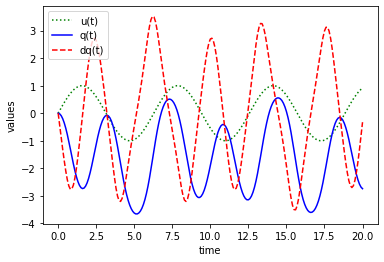

In [2]:
%reset -f
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#######  1B  ########

def model(x,t,u):
    g   = 9.98
  
    q  = x[0]
    dq = x[1]
    
    xdot1 = dq
    xdot2 = (u - g/2*np.cos(q))*12/13 
    xdot  = [xdot1,xdot2]
    
    return xdot

# initial condition
x0 = [0,0]

# number of time points
n = 201

# time points
t = np.linspace(0,20,n)

# sine input
u = np.sin(t)

# store solution in an array like t
q = np.empty_like(t)
dq = np.empty_like(t)

# record initial conditions
q[0]  = x0[0]
dq[0] = x0[1]

# solve ODE for each step
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    x = odeint(model,x0,tspan,args=(u[i],))
    # store solution for plotting
    q[i]  = x[1][0]
    dq[i] = x[1][1]
    # next initial condition
    x0 = x[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,q,'b-',label='q(t)')
plt.plot(t,dq,'r--',label='dq(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


In [4]:
### exercise 2 A
%reset -f
import numpy as np
from robopy import *
from robopy import serial_link as sl
import matplotlib.pyplot as plt
import math 

j      = 1
offset = 0
qlim = [0,3.14] # the range q is allowed to take values from

q1 = 0
q2 = 0.9
l1 = 0.095 
l2 = 0.1

# j, theta, d, a , alpha, offset, qlim
L1 = sl.Revolute(j,q1, 0, 0,  -math.pi/2, offset,qlim)
L2 = sl.Revolute(j,q2, 0, l1, -math.pi/2, offset,qlim)

bot = sl.SerialLink([L1,L2], name = 'bot lab7', tool = trotx(-math.pi/2)*transl(0,0,l2))




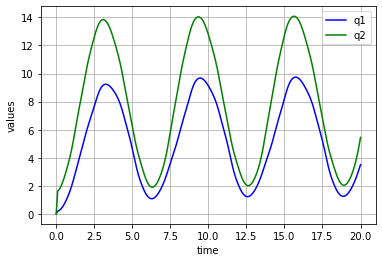

In [5]:

########### 2B ############

%reset -f
import matplotlib.pyplot as plt
from odeintw import *
import math as m
import numpy as np
from math import pi

def model(x,t,u):
    g   = 9.8
  
    u = u.reshape(2,1) # reshaping for mathematical operations
    
    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    D = np.array([[0.003515*m.cos(q[1])+0.000925*m.cos(q[1])*m.cos(q[1])+0.026254,  0       ],
         [0,                                                   0.023625]])
    

    C = np.array([[0.24-0.0017575*dq[1]*m.sin(q[1])-0.0004625*dq[1]*m.sin(2*q[1]), -0.0004625*dq[0]*m.sin(2*q[1])-0.0017575*dq[0]*m.sin(q[1])],
         [0.0004625*dq[0]*m.sin(2*q[1])+0.0017575*dq[0]*m.sin(q[1]),           0.16]])

 
    G = np.array([[(-0.1815*m.cos(q[1])-0.1376)*m.sin(q[0])],
        [-0.18149*m.cos(q[0])*m.sin(q[1])]])
    

    xdot1 = dq.reshape(2,1)
    xdot2 = np.matmul(np.linalg.inv(D), (u - C.dot(dq).reshape(2,1) - G))
    
    xdot = np.concatenate((xdot1, xdot2), axis=1)

    return xdot



# nr of samples
n = 201

# final time
tf = 20

# Desired time samples for the solution.
t = np.linspace(0, tf, n)

# The matrix of input `u`, passed as extra argument to `model`

u = np.array([[np.sin(t)],
              [np.sin(t)]]).reshape(2,n)

q1  = np.empty_like(t)
q2  = np.empty_like(t)
dq1 = np.empty_like(t)
dq2 = np.empty_like(t)


# x0 is the initial condition.
x0 = np.array([[pi/18, 0.0],
               [pi/2, 0.0]])


# solve ODE for each step
for i in range(1,n):
    
    # span for next time step
    tspan = [t[i-1],t[i]]
    
    # solve for next step
    x = odeintw(model,x0,tspan,args=(u[:,i],))
    
    # store solution for plotting
    q1[i]  = x[1][0,0]
    q2[i]  = x[1][1,0]
    dq1[i] = x[1][0,1]
    dq2[i] = x[1][1,1]
    
    # next initial condition 
    x0 = x[1]
    

plt.figure(1)
plt.plot(t, q1, 'b', label='q1')
plt.plot(t, q2, 'g', label='q2')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)
plt.show()